# Medidas de Tendencia Central y Dispersión

Hemos estado organizando y visualizando los datos de distintas maneras, pero ¿qué intuiciones podemos obtener?

Las visualizaciones como histogramas o gráficos de conteo muestran la cantidad de veces que se observa cada valor en un conjunto de realizaciones de una variable aleatoria. Esto se denomina análisis de frecuencia, y es parte de la **estadística descriptiva**.

El uso de visualizaciones nos limita a estimaciones, pero los datos crudos son demasiado como para intepretarlos en conjunto. Para eso, la estadística descriptiva provee también medidas de tendencia central y de dispersión, que resumen en un valor numérico propiedades de las realizaciones de la variable.


In [3]:
import pandas as pd
pd.set_option("display.max_columns", 40)


df = pd.read_csv("encuesta-trabajadores-2020.csv")
df.sample(2)

,profile_gender,profile_age,work_country,work_province,profile_studies_level,profile_studies_level_state,profile_career,profile_university,work_role,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,profile_sexual_orientation,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_extra_benefits,company_best_companies_city
1973,Mujer,29,Argentina,Neuquén,Universitario,En curso,Licenciatura en Ciencias dela Computación,UNCOMA - Universidad Nacional del Comahue,Developer,67440.0,51700.0,NaN,2,2,No,No recibo bono,No,0.0,0,NaN,NaN,10001+,Otras industrias,Ninguna de las anteriores,NaN
3286,Mujer,44,Argentina,Provincia de Buenos Aires,Universitario,Incompleto,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,Developer,100000.0,80000.0,NaN,2,2,No,No recibo bono,No,0.0,0,Heterosexual,NaN,Nov-50,Producto basado en Software,Stock options / RSUs,NaN


## Medidas de tendencia central

Cuando se quiere obtener un valor representativo de un conjunto de datos, o su centro, se utiliza una *medida de tendencia central*.

Repasando, dada X una variable y un conjunto de realizaciones $x = \{ x_1, x_2 ... \}$ donde $x_i = X(\omega)$ para algún $\omega \in \Omega$, y $N = |x|$:

* La **media muestral** (aritmética) o promedio se calcula como:

$$ \bar{x} = \frac{1}{N} \sum_i^N x_i $$

* La **mediana** se calcula:
  1. Ordenar las realizaciones tal que $x_j \leq x_{j+1}$ 
  2. Si la cantidad de datos $N$ es impar, la mediana es el valor central: $median = x_{\lfloor N / 2 \rfloor +1}$
  3. Si la cantidad de datos $N$ es par, la mediana es e promedio de los dos valores centrales: $median = \frac{1}{2} (x_{ N / 2 } + x_{ (N / 2) +1})$

* La **moda** son los valores con mayor frecuencia, es decir, los que más se repite.


In [9]:
print("Media: \t\t", df.salary_monthly_BRUTO.mean())
print("Mediana: \t", df.salary_monthly_BRUTO.median())
print("Moda: \t\t", df.salary_monthly_BRUTO.mode()[0])

Media: 		 124058.54962132896
Mediana: 	 96000.0
Moda: 		 100000.0


**¿Por qué las dos medidas son tan distintas?**

Propiedades de la media:
* Se puede interpretar como el *centro de masa* del histograma. Es decir, si el histograma fuera una figura de madera, el punto de equilibrio donde podemos apoyarlo y no se cae es la media.
* Es muy sensible a valores extremos. 

In [14]:
import numpy as np
edades = np.array(df.profile_age.unique())
edades

array([   26,    29,    22,    39,    32,    25,    33,    23,    40,
          35,    37,    34,    45,    42,    31,    24,    38,    41,
          30,    28,    53,    21,    27,    43,    50,    44,    20,
          19,    47,    36,    48,    46,    49,    52,    18,    56,
          55,    54,    51,    61,    57,    67,    58,   567,    65,
          59,    60,    64,    62, 52000], dtype=int64)

In [17]:
print("Media: \t\t", np.mean(edades))
print("Mediana: \t", np.median(edades))

Media: 		 1091.26
Mediana: 	 42.5


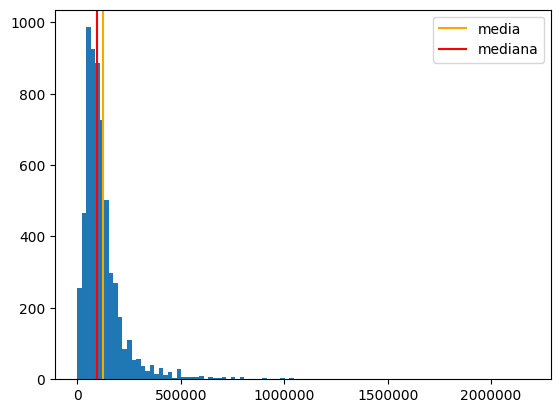

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(df.salary_monthly_BRUTO, bins=100)
ax.ticklabel_format(style="plain")

ax.axvline(df.salary_monthly_BRUTO.mean(), color="orange", label="media")
ax.axvline(df.salary_monthly_BRUTO.median(), color="red", label="mediana")
ax.legend()

plt.show()

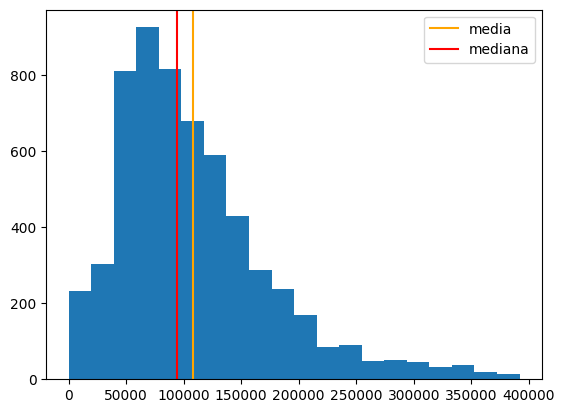

In [31]:
import matplotlib.pyplot as plt

df_filtered = df[ df.salary_monthly_BRUTO < 400000]


fig, ax = plt.subplots()

ax.hist(df_filtered.salary_monthly_BRUTO, bins=20)
ax.ticklabel_format(style="plain")

ax.axvline(df_filtered.salary_monthly_BRUTO.mean(), color="orange", label="media")
ax.axvline(df_filtered.salary_monthly_BRUTO.median(), color="red", label="mediana")
ax.legend()

plt.show()

### Medidas de dispersión

Las medidas de dispersión vistas en el teórico son la desviación estándar, la varianza, y el coeficiente de variación. También permiten representar con un número alguna propiedad de los datos.

Por ejemplo, comparemos el salario neto con el salario bruto. A priori, **¿deberíamos ver alguna diferencia?**

In [35]:
df.salary_monthly_BRUTO.describe().round(2)

count       6095.00
mean      124058.55
std       122912.35
min            1.00
25%        61595.00
50%        96000.00
75%       145000.00
max      2180000.00
Name: salary_monthly_BRUTO, dtype: float64

### Varianza
$$\sigma^2 = \frac{1}{N}\sum_{i=1}^N(x_i - \mu)^2$$

La varianza es una medida de dispersión que representa la variabilidad de una serie de datos con respecto a su media.

In [37]:
df.salary_monthly_BRUTO.var()

15107446234.536167

### Desviación estándar

$$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^N(x_i - \mu)^2}$$

La desviación estándar es un promedio de las desviaciones individuales de cada observación con respecto a la media de una distribución.

In [38]:
df.salary_monthly_BRUTO.std()

122912.35183876423

In [39]:
df_filtered.salary_monthly_BRUTO.std()

67953.33097916115

In [41]:
import numpy as np
np.array([2000,26,28]).std()

930.0814779123148

## Percentiles y gráficos de caja

Los gráficos de caja son otra forma de representar la distribución de las realizaciones de una varaible numérica, de una forma más condensada que un histograma.

Son muy útiles para comparar muchas distribuciones, pero sólo cuando son muy distintas entre ellas, ya que oscurecen algunas sutilezas.

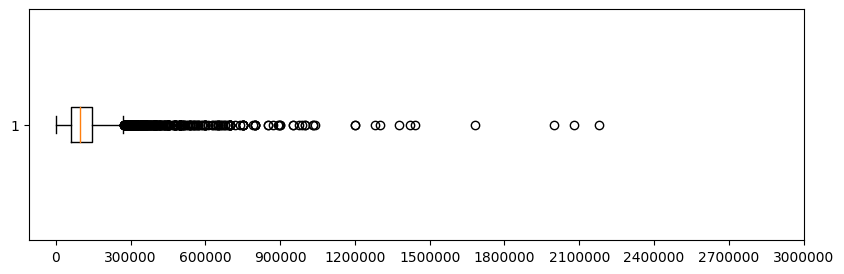

In [51]:
plt.figure(figsize=(10,3))
plt.boxplot(df.salary_monthly_BRUTO, vert=False)
plt.ticklabel_format(style="plain", axis="x")
plt.xticks(np.linspace(0, 3000000, 11))
plt.show()

In [53]:
df.sample(3)

,profile_gender,profile_age,work_country,work_province,profile_studies_level,profile_studies_level_state,profile_career,profile_university,work_role,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,profile_sexual_orientation,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_extra_benefits,company_best_companies_city
4754,Hombre,46,Argentina,GBA,Universitario,Completado,Licenciatura en Informática,UP - Universidad de Palermo,Developer,105750.0,86722.0,NaN,1,1,No,No recibo bono,No,0.0,0,Heterosexual,No,5001-10000,Otras industrias,Ninguna de las anteriores,NaN
3073,Hombre,29,Argentina,Ciudad Autónoma de Buenos Aires,Universitario,Completado,Ingeniero de gas,Exterior,Developer,45000.0,38900.0,NaN,3,2,No,No recibo bono,No,0.0,0,Heterosexual,NaN,201-500,Servicios / Consultoría de Software / Digital,"Capacitaciones y/o cursos, Clases de gimnasia ...",NaN
5058,Mujer,27,Argentina,Ciudad Autónoma de Buenos Aires,Universitario,Incompleto,Ingeniería en Sistemas de Información,UBA - Universidad de Buenos Aires,Developer,80000.0,56000.0,NaN,3,2,De uno a tres sueldos,Mix de las anteriores,Uno,10.0,3,Homosexual,NaN,501-1000,Producto basado en Software,"Abono de Internet, Capacitaciones y/o cursos, ...",NaN


In [55]:
df.profile_studies_level.unique()

array(['Universitario', 'Secundario', 'Posgrado', 'Terciario',
       'Doctorado', 'Posdoctorado', 'Primario'], dtype=object)

In [56]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\User01\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


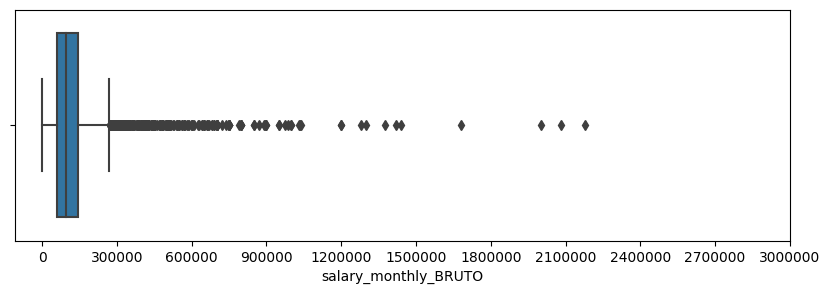

In [58]:
import seaborn as sns
plt.figure(figsize=(10,3))

sns.boxplot(x=df.salary_monthly_BRUTO)

plt.ticklabel_format(style="plain", axis="x")
plt.xticks(np.linspace(0, 3000000, 11))
plt.show()

c:\Users\User01\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User01\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User01\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User01\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option 

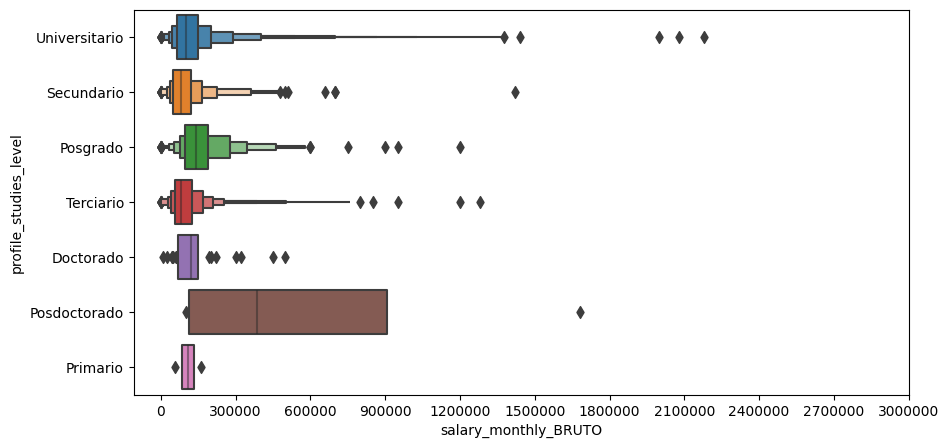

In [62]:
plt.figure(figsize=(10,5))
sns.boxenplot(df, x="salary_monthly_BRUTO", y="profile_studies_level")
plt.xticks(np.linspace(0, 3000000, 11))
plt.ticklabel_format(style="plain", axis="x")
plt.show()